<a href="https://colab.research.google.com/github/robswyn/Machine-Learning/blob/master/LogitRegressFraudDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import dependancies 

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
credit_card = pd.read_csv('creditcard.csv')

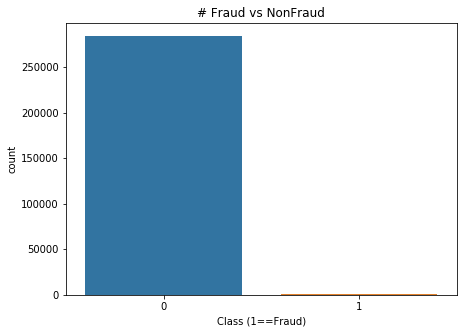

In [7]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='Class', data=credit_card)
_ = plt.title('# Fraud vs NonFraud')
_ = plt.xlabel('Class (1==Fraud)')

#Baseline output

In [8]:
base_line_accuracy = 1-np.sum(credit_card.Class)/credit_card.shape[0]
base_line_accuracy

0.9982725143693799

In [0]:
X = credit_card.drop(columns='Class', axis=1)
y = credit_card.Class.values

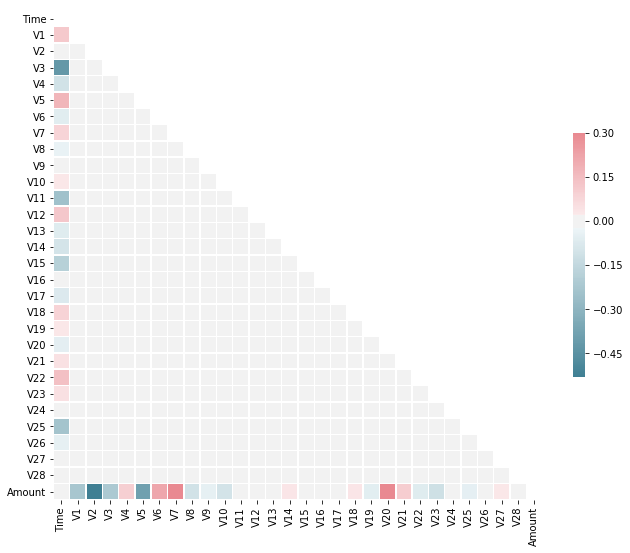

In [10]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Train Model 


In [0]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Model definition

In [16]:
lr.fit(scaler.fit_transform(X_train), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr.predict(scaler.transform(X_train))

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

Fit our model to the training data

In [18]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Training score and Test score

In [19]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

Confusion matrix:
 [[213200     26]
 [   137    242]]
Training accuracy: 99.9237 %
Training AUC: 98.0664 %


 68 fraudulent transactions out of 113 (recall of 60%) and produce 12 false alarms (<0.02%) on the test data.

In [20]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)

Confusion matrix:
 [[71077    12]
 [   45    68]]
Training accuracy: 99.9199 %
Training AUC: 97.4810 %


In [21]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.999367  0.999831  0.999599     71089
           1   0.850000  0.601770  0.704663       113

    accuracy                       0.999199     71202
   macro avg   0.924684  0.800801  0.852131     71202
weighted avg   0.999130  0.999199  0.999131     71202



Visualize the Receiver-Operator-Curve

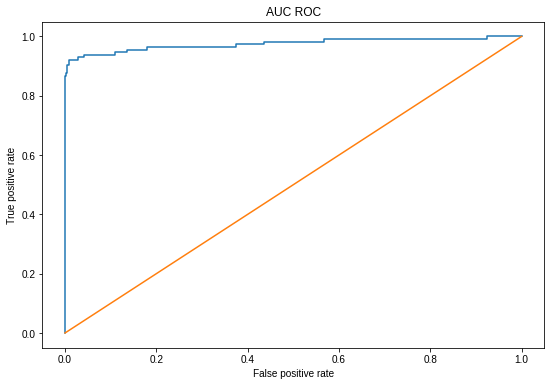

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)

#If we set the threshold to 90% the recall decrease from 60% to 45%. while the false positve rate is the same. We can see that our model assign some non-fraudulent a very high probability to be fraud

In [23]:
y_hat_90 = (y_test_hat_probs > 0.90 )*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_90))
print(classification_report(y_test, y_hat_90, digits=6))

Confusion matrix:
 [[71077    12]
 [   62    51]]
              precision    recall  f1-score   support

           0   0.999128  0.999831  0.999480     71089
           1   0.809524  0.451327  0.579545       113

    accuracy                       0.998961     71202
   macro avg   0.904326  0.725579  0.789513     71202
weighted avg   0.998828  0.998961  0.998813     71202



#If we set the threshold down to 10%, we can detect around 75% of all fraud case but almost double our false positive rate (now 25 false alarms)

In [24]:
y_hat_10 = (y_test_hat_probs > 0.10)*1
print('Confusion matrix:\n', confusion_matrix(y_test, y_hat_10))
print(classification_report(y_test, y_hat_10, digits=4))

Confusion matrix:
 [[71064    25]
 [   25    88]]
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     71089
           1     0.7788    0.7788    0.7788       113

    accuracy                         0.9993     71202
   macro avg     0.8892    0.8892    0.8892     71202
weighted avg     0.9993    0.9993    0.9993     71202

